In [1]:
import pandas as pd
import matplotlib.pyplot as mp
from pylab import mpl  # 显示中文
import sklearn.metrics as sm
import sklearn.ensemble as se
import numpy as np
import sklearn.model_selection as ms

In [2]:
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong']
# 读取csv文件数据
df = pd.read_csv('bank.csv', sep=',',  engine='python')
print(df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [3]:
# 检查数据是否有缺失值
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


In [4]:
# 查看数据整体情况
print(df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


In [5]:
# 获得客户是否投资定期存款人数数据
dep = df.deposit.value_counts()
print(dep)
print(type(dep))

no     5873
yes    5289
Name: deposit, dtype: int64
<class 'pandas.core.series.Series'>


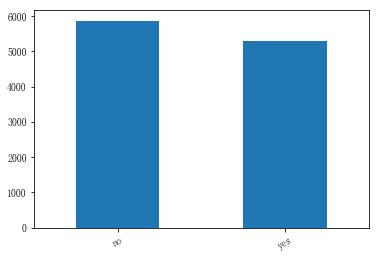

In [6]:
# 绘制deposit列的柱状图（条形图）
dep.plot(kind='bar', rot=30)
# 显示图像
mp.show()

0        (50, 60]
1        (50, 60]
2        (40, 50]
3        (50, 60]
4        (50, 60]
5        (40, 50]
6        (50, 60]
7        (50, 60]
8        (30, 40]
9        (20, 30]
10       (30, 40]
11       (20, 30]
12       (20, 30]
13       (40, 50]
14       (30, 40]
15       (30, 40]
16       (30, 40]
17       (40, 50]
18       (40, 50]
19       (40, 50]
20       (20, 30]
21       (40, 50]
22       (40, 50]
23       (40, 50]
24       (30, 40]
25       (30, 40]
26       (30, 40]
27       (40, 50]
28       (30, 40]
29       (20, 30]
           ...   
11132    (30, 40]
11133    (30, 40]
11134    (50, 60]
11135    (30, 40]
11136    (30, 40]
11137    (40, 50]
11138    (30, 40]
11139    (20, 30]
11140    (50, 60]
11141    (30, 40]
11142    (50, 60]
11143    (30, 40]
11144    (50, 60]
11145    (50, 60]
11146    (20, 30]
11147    (40, 50]
11148    (30, 40]
11149    (40, 50]
11150    (30, 40]
11151    (30, 40]
11152    (30, 40]
11153    (40, 50]
11154    (50, 60]
11155    (30, 40]
11156    (

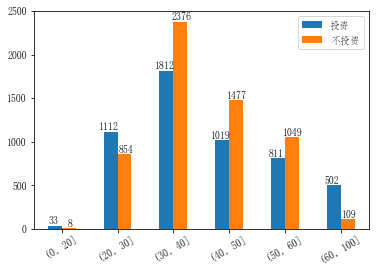

In [7]:
# 分析age对投资的影响
# 将age列分段处理
bins = [0, 20, 30, 40, 50, 60, 100]
cut_age = pd.cut(df['age'], bins)
print(cut_age)
# 给数据增添cut_age这一列
df['cut_age'] = cut_age
print(df.head())
# 获得以客户是否投资定期存款为依据的年龄分布情况的人数数据
age_dep_y = df.cut_age[df.deposit == 'yes'].value_counts()
age_dep_n = df.cut_age[df.deposit == 'no'].value_counts()
age_dep = pd.DataFrame({'投资': age_dep_y, '不投资': age_dep_n})
print(age_dep)
print(type(age_dep))
# 绘制根据是否投资的年龄分布情况的柱状图（条形图）
bar = age_dep.plot(kind='bar', rot=30)
print(type(bar))
print(bar.get_xticks())
print(bar.get_yticks())
# 为柱状图添加顶部数值标签
xx = [-0.15, 0.15, 0.85, 1.15, 1.85, 2.15, 2.85, 3.15, 3.85, 4.15, 4.85, 5.15]
yy = [33, 8, 1112, 854, 1812, 2376, 1019, 1477, 811, 1049, 502, 109]
for x, y in zip(xx, yy):
    mp.text(x, y + 20, str(y), ha='center')
# mp.show()

                 投资   不投资
admin.          631   703
blue-collar     708  1236
entrepreneur    123   205
housemaid       109   165
management     1301  1265
retired         516   262
self-employed   187   218
services        369   554
student         269    91
technician      840   983
unemployed      202   155
unknown          34    36
<class 'pandas.core.frame.DataFrame'>


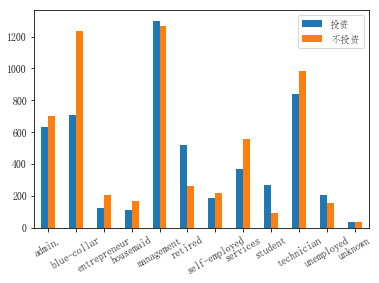

In [8]:
# 分析职位类别对投资的影响
# 获得以客户是否投资定期存款为依据的年龄分布情况的人数数据
job_dep_y = df.job[df.deposit == 'yes'].value_counts()
job_dep_n = df.job[df.deposit == 'no'].value_counts()
job_dep = pd.DataFrame({'投资': job_dep_y, '不投资': job_dep_n})
print(job_dep)
print(type(job_dep))
# 绘制根据是否投资的年龄分布情况的柱状图（条形图）
job_dep.plot(kind='bar', rot=30)
# mp.show()

            投资   不投资
married   2755  3596
single    1912  1606
divorced   622   671


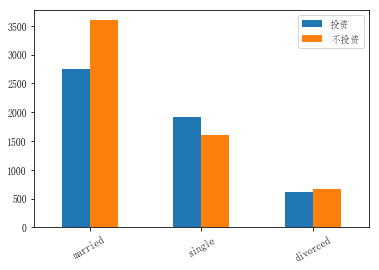

In [9]:
# 分析结婚情况对投资的影响
mar_dep_y = df.marital[df.deposit == 'yes'].value_counts()
mar_dep_n = df.marital[df.deposit == 'no'].value_counts()
mar_dep = pd.DataFrame({'投资': mar_dep_y, '不投资': mar_dep_n})
print(mar_dep)
mar_dep.plot(kind='bar', rot=30)
# mp.show()

       投资   不投资
no   5237  5757
yes    52   116


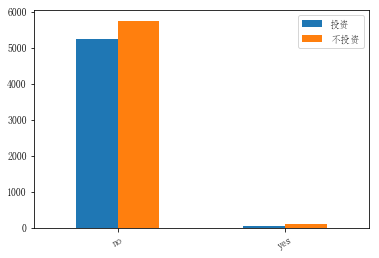

In [10]:
# 分析信用卡违约情况对投资的影响
def_dep_y = df.default[df.deposit == 'yes'].value_counts()
def_dep_n = df.default[df.deposit == 'no'].value_counts()
def_dep = pd.DataFrame({'投资': def_dep_y, '不投资': def_dep_n})
print(def_dep)
def_dep.plot(kind='bar', rot=30)
mp.show()

       投资   不投资
no   3354  2527
yes  1935  3346


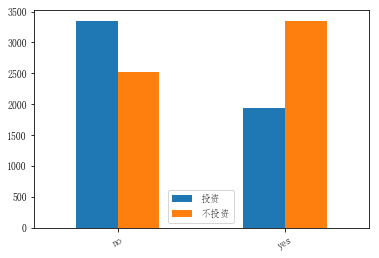

In [11]:
# 分析房贷情况对投资的影响
def_dep_y = df.housing[df.deposit == 'yes'].value_counts()
def_dep_n = df.housing[df.deposit == 'no'].value_counts()
def_dep = pd.DataFrame({'投资': def_dep_y, '不投资': def_dep_n})
print(def_dep)
def_dep.plot(kind='bar', rot=30)
mp.show()

0        (2000, 4000]
1            (0, 500]
2        (1000, 2000]
3        (2000, 4000]
4            (0, 500]
5           (-500, 0]
6         (500, 1000]
7         (500, 1000]
8            (0, 500]
9        (4000, 8000]
10           (0, 500]
11           (0, 500]
12           (0, 500]
13           (0, 500]
14        (500, 1000]
15       (2000, 4000]
16        (500, 1000]
17          (-500, 0]
18           (0, 500]
19           (0, 500]
20        (500, 1000]
21       (2000, 4000]
22           (0, 500]
23          (-500, 0]
24           (0, 500]
25           (0, 500]
26           (0, 500]
27           (0, 500]
28           (0, 500]
29        (500, 1000]
             ...     
11132       (-500, 0]
11133    (1000, 2000]
11134    (2000, 4000]
11135        (0, 500]
11136       (-500, 0]
11137        (0, 500]
11138        (0, 500]
11139    (2000, 4000]
11140    (2000, 4000]
11141        (0, 500]
11142        (0, 500]
11143        (0, 500]
11144       (-500, 0]
11145       (-500, 0]
11146     

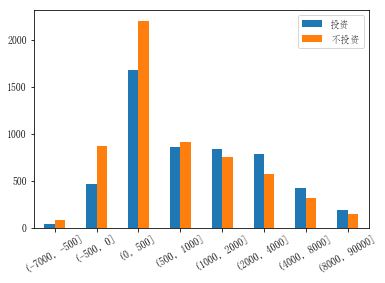

In [12]:
# 分析balance对投资的影响
# 将balance列分段处理
bins = [-7000,-500, 0, 500, 1000, 2000, 4000, 8000, 90000]
cut_balance = pd.cut(df['balance'], bins)
print(cut_balance)
# 给数据增添cut_balance这一列
df['cut_balance'] = cut_balance
print(df.head())
# 获得以客户是否投资定期存款为依据的年度存款余额（欧元）情况的人数数据
balance_dep_y = df.cut_balance[df.deposit == 'yes'].value_counts()
balance_dep_n = df.cut_balance[df.deposit == 'no'].value_counts()
balance_dep = pd.DataFrame({'投资': balance_dep_y, '不投资': balance_dep_n})
print(balance_dep)
print(type(balance_dep))
# 绘制根据是否投资的年度存款余额（欧元）情况的柱状图（条形图）
bar = balance_dep.plot(kind='bar', rot=30)

0        (1000, 4000]
1        (1000, 4000]
2        (1000, 4000]
3         (500, 1000]
4         (500, 1000]
5         (500, 1000]
6        (1000, 4000]
7        (1000, 4000]
8         (500, 1000]
9        (1000, 4000]
10        (500, 1000]
11       (1000, 4000]
12       (1000, 4000]
13       (1000, 4000]
14        (500, 1000]
15       (1000, 4000]
16        (500, 1000]
17       (1000, 4000]
18       (1000, 4000]
19        (500, 1000]
20         (200, 500]
21        (500, 1000]
22       (1000, 4000]
23       (1000, 4000]
24        (500, 1000]
25        (500, 1000]
26         (200, 500]
27        (500, 1000]
28        (500, 1000]
29        (500, 1000]
             ...     
11132      (100, 200]
11133      (100, 200]
11134        (0, 100]
11135      (200, 500]
11136        (0, 100]
11137      (200, 500]
11138     (500, 1000]
11139     (500, 1000]
11140        (0, 100]
11141      (200, 500]
11142     (500, 1000]
11143      (100, 200]
11144      (200, 500]
11145      (200, 500]
11146     

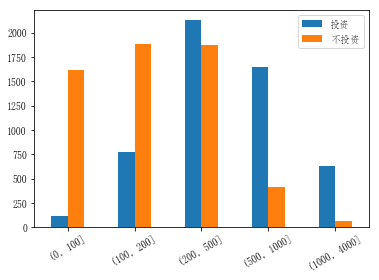

In [13]:
# 分析duration对投资的影响
# 将duration列分段处理
bins = [0,100, 200, 500, 1000, 4000]
cut_duration = pd.cut(df['duration'], bins)
print(cut_duration)
# 给数据增添cut_duration这一列
df['cut_duration'] = cut_duration
print(df.head())
# 获得以客户是否投资定期存款为依据的年度存款余额（欧元）情况的人数数据
duration_dep_y = df.cut_duration[df.deposit == 'yes'].value_counts()
duration_dep_n = df.cut_duration[df.deposit == 'no'].value_counts()
duration_dep = pd.DataFrame({'投资': duration_dep_y, '不投资': duration_dep_n})
print(duration_dep)
print(type(duration_dep))
# 绘制根据是否投资的年度存款余额（欧元）情况的柱状图（条形图）
bar = duration_dep.plot(kind='bar', rot=30)

In [14]:
# 删除contact、month、day、cut_age、poutcome三列
df = df.drop(['contact', 'month', 'day', 'cut_age', 'cut_balance','cut_duration','poutcome'], axis=1)
print(df.head())

   age         job  marital  education default  balance housing loan  \
0   59      admin.  married  secondary      no     2343     yes   no   
1   56      admin.  married  secondary      no       45      no   no   
2   41  technician  married  secondary      no     1270     yes   no   
3   55    services  married  secondary      no     2476     yes   no   
4   54      admin.  married   tertiary      no      184      no   no   

   duration  campaign  pdays  previous deposit  
0      1042         1     -1         0     yes  
1      1467         1     -1         0     yes  
2      1389         1     -1         0     yes  
3       579         1     -1         0     yes  
4       673         2     -1         0     yes  


In [15]:
# 删除不清楚job的样本
df = df[~df['job'].isin(['unknown'])]
print(type(df))
print(df.info())
print(df.job.value_counts())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11161
Data columns (total 13 columns):
age          11092 non-null int64
job          11092 non-null object
marital      11092 non-null object
education    11092 non-null object
default      11092 non-null object
balance      11092 non-null int64
housing      11092 non-null object
loan         11092 non-null object
duration     11092 non-null int64
campaign     11092 non-null int64
pdays        11092 non-null int64
previous     11092 non-null int64
deposit      11092 non-null object
dtypes: int64(6), object(7)
memory usage: 1.2+ MB
None
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
Name: job, dtype: int64


In [16]:
# 删除不清楚education的样本
df = df[~df['education'].isin(['unknown'])]
print(df.info())
print(df.education.value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10634 entries, 0 to 11161
Data columns (total 13 columns):
age          10634 non-null int64
job          10634 non-null object
marital      10634 non-null object
education    10634 non-null object
default      10634 non-null object
balance      10634 non-null int64
housing      10634 non-null object
loan         10634 non-null object
duration     10634 non-null int64
campaign     10634 non-null int64
pdays        10634 non-null int64
previous     10634 non-null int64
deposit      10634 non-null object
dtypes: int64(6), object(7)
memory usage: 1.1+ MB
None
secondary    5461
tertiary     3680
primary      1493
Name: education, dtype: int64


In [17]:
# 获取训练集数据，即pdays不为-1的样本
df = df[~df['pdays'].isin([-1])]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2695 entries, 890 to 11160
Data columns (total 13 columns):
age          2695 non-null int64
job          2695 non-null object
marital      2695 non-null object
education    2695 non-null object
default      2695 non-null object
balance      2695 non-null int64
housing      2695 non-null object
loan         2695 non-null object
duration     2695 non-null int64
campaign     2695 non-null int64
pdays        2695 non-null int64
previous     2695 non-null int64
deposit      2695 non-null object
dtypes: int64(6), object(7)
memory usage: 294.8+ KB
None


In [18]:
# 将deposit列中的yes用1代替，no用0代替，并对该列进行保存用于后面训练的输出值
df.deposit[df['deposit'] == 'yes'] = 1
df.deposit[df['deposit'] == 'no'] = 0
df_dep = df['deposit']
print(df.head())
# print(df_dep)

     age         job  marital  education default  balance housing loan  \
890   42      admin.   single  secondary      no     -247     yes  yes   
891   33    services  married  secondary      no     3444     yes   no   
899   56  technician  married  secondary      no      589     yes   no   
933   34      admin.  married   tertiary      no      899     yes   no   
951   53     retired  married   tertiary      no     2269      no   no   

     duration  campaign  pdays  previous deposit  
890       519         1    166         1       1  
891       144         1     91         4       1  
899       518         1    147         2       1  
933       114         1    170         3       1  
951      1091         2    150         1       1  


C:\Users\46124\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# 删除pdays、deposit列
df = df.drop(['pdays', 'deposit'], axis=1)
print(df.head())

     age         job  marital  education default  balance housing loan  \
890   42      admin.   single  secondary      no     -247     yes  yes   
891   33    services  married  secondary      no     3444     yes   no   
899   56  technician  married  secondary      no      589     yes   no   
933   34      admin.  married   tertiary      no      899     yes   no   
951   53     retired  married   tertiary      no     2269      no   no   

     duration  campaign  previous  
890       519         1         1  
891       144         1         4  
899       518         1         2  
933       114         1         3  
951      1091         2         1  


In [20]:
# 对age、balance、duration、campaign进行标准差标准化处理
a = df.age
df['age_scaled'] = (a - a.mean()) / (a.std())
df = df.drop('age', axis=1)

b = df.balance
df['balance_scaled'] = (b - b.mean()) / (b.std())
df = df.drop('balance', axis=1)

d = df.duration
df['duration_scaled'] = (d - d.mean()) / (d.std())
df = df.drop('duration', axis=1)

c = df.campaign
df['campaign_scaled'] = (c - c.mean()) / (c.std())
df = df.drop('campaign', axis=1)

p = df.previous
df['previous_scaled'] = (p - p.mean()) / (p.std())

In [21]:
# 将字符串形式的特征值转换为数值型，即对字符串特征进行哑变量操作
df = pd.get_dummies(df)
print(df.head())

     previous  age_scaled  balance_scaled  duration_scaled  campaign_scaled  \
890         1    0.039857       -0.541785         0.608405        -0.678219   
891         4   -0.665785        0.442230        -0.718910        -0.678219   
899         2    1.137523       -0.318909         0.604865        -0.678219   
933         3   -0.587381       -0.236263        -0.825095        -0.678219   
951         1    0.902308        0.128977         2.633002         0.081465   

     previous_scaled  job_admin.  job_blue-collar  job_entrepreneur  \
890        -0.638589           1                0                 0   
891         0.192275           0                0                 0   
899        -0.361634           0                0                 0   
933        -0.084679           1                0                 0   
951        -0.638589           0                0                 0   

     job_housemaid  ...  marital_single  education_primary  \
890              0  ...             

In [22]:
# 从df_dep中得到输出值y
y = df_dep.values.astype('int')
print(y.shape)
print(type(y))
print(y)

(2695,)
<class 'numpy.ndarray'>
[1 1 1 ... 0 0 0]


In [23]:
# 从df中得到输入值x
x = df.values
print(x.shape)

(2695, 29)


In [24]:
# 通过网格搜索确定最优的超参数组合
params = [
    {'max_depth': [7,8,9,10,11,12,13,14], 'n_estimators': [150,200,250,300,350,400]}
  ]

# 创建随机森林分类器，利用网格搜索确定最优超参数
model = ms.GridSearchCV(se.RandomForestClassifier(random_state=7),params,cv=5)

# 训练模型
model.fit(x, y)
# 最优参数组合
print(model.best_params_)
for param, score in zip(
        model.cv_results_['params'],
        model.cv_results_['mean_test_score']):
    print(param, '->', score)
#最优模型
print(model.best_estimator_)

{'max_depth': 9, 'n_estimators': 350}
{'max_depth': 7, 'n_estimators': 150} -> 0.7781076066790352
{'max_depth': 7, 'n_estimators': 200} -> 0.7781076066790352
{'max_depth': 7, 'n_estimators': 250} -> 0.7766233766233767
{'max_depth': 7, 'n_estimators': 300} -> 0.7773654916512059
{'max_depth': 7, 'n_estimators': 350} -> 0.7792207792207793
{'max_depth': 7, 'n_estimators': 400} -> 0.7784786641929499
{'max_depth': 8, 'n_estimators': 150} -> 0.7755102040816326
{'max_depth': 8, 'n_estimators': 200} -> 0.7781076066790352
{'max_depth': 8, 'n_estimators': 250} -> 0.7788497217068646
{'max_depth': 8, 'n_estimators': 300} -> 0.7807050092764378
{'max_depth': 8, 'n_estimators': 350} -> 0.7788497217068646
{'max_depth': 8, 'n_estimators': 400} -> 0.7784786641929499
{'max_depth': 9, 'n_estimators': 150} -> 0.7788497217068646
{'max_depth': 9, 'n_estimators': 200} -> 0.7792207792207793
{'max_depth': 9, 'n_estimators': 250} -> 0.7807050092764378
{'max_depth': 9, 'n_estimators': 300} -> 0.7810760667903525
{'

In [25]:
# 创建随机森林分类器
model = se.RandomForestClassifier(
    max_depth=9, n_estimators=350, random_state=7)

# 训练模型
model.fit(x, y)
# 模型训练集得分
pred_y = model.predict(x)
print(sm.f1_score(y, pred_y, average='weighted'))

0.8652443587142691


In [26]:
# 从模型中获取特征重要性，只有决策树类型的模型才能获取特征重要性
fi = model.feature_importances_
fi

array([0.03673615, 0.06759727, 0.08892249, 0.41122421, 0.03892688,
       0.03622606, 0.00636182, 0.01759194, 0.00467551, 0.003081  ,
       0.00701885, 0.00562413, 0.00433891, 0.00459609, 0.0039746 ,
       0.00810227, 0.00378586, 0.00618985, 0.00979571, 0.00888276,
       0.00732027, 0.00905406, 0.01421141, 0.00167664, 0.00158868,
       0.07807389, 0.07851124, 0.0170709 , 0.01884058])

In [27]:
# 获取DataFrame数据的所有特征名
fn = df.columns.values.tolist()
fn = np.array(fn)
print(fn)
print(type(fn))

['previous' 'age_scaled' 'balance_scaled' 'duration_scaled'
 'campaign_scaled' 'previous_scaled' 'job_admin.' 'job_blue-collar'
 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired'
 'job_self-employed' 'job_services' 'job_student' 'job_technician'
 'job_unemployed' 'marital_divorced' 'marital_married' 'marital_single'
 'education_primary' 'education_secondary' 'education_tertiary'
 'default_no' 'default_yes' 'housing_no' 'housing_yes' 'loan_no'
 'loan_yes']
<class 'numpy.ndarray'>


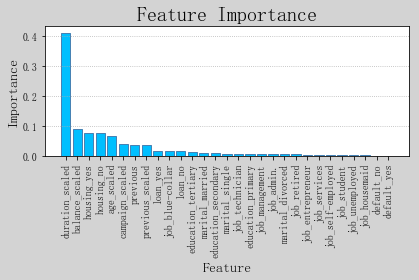

In [28]:
# 可视化不同特征的重要性排序
mp.figure('Feature Importance', facecolor='lightgray')
mp.title('Feature Importance', fontsize=20)
mp.xlabel('Feature', fontsize=14)
mp.ylabel('Importance', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(axis='y', linestyle=':')
sorted_indices = fi.argsort()[::-1]
pos = np.arange(sorted_indices.size)
mp.bar(pos, fi[sorted_indices], facecolor='deepskyblue',
       edgecolor='steelblue')
mp.xticks(pos, fn[sorted_indices], rotation=90)
mp.tight_layout()
mp.show()